# Task 2: Exploratory Data Analysis (EDA)

### 0) Setup

In [8]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px
sns.set_theme(style="whitegrid")
pd.set_option("display.max_columns", 120)

### 1) Load data

In [10]:
DATA_PATH = r"S:\SUNNY PC\Elevate Labs\Datasets\Titanic-Dataset.csv"  # change if different
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head())

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2) Data health + summary statistics

In [11]:
display(df.info())  # dtypes & non-nulls
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame("missing_count"))
desc_num = df.describe().T  # mean, std, min, quartiles, max
display(desc_num)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,missing_count
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 3) Numeric/Category splits

In [12]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


### 4) Univariate: histograms for numeric

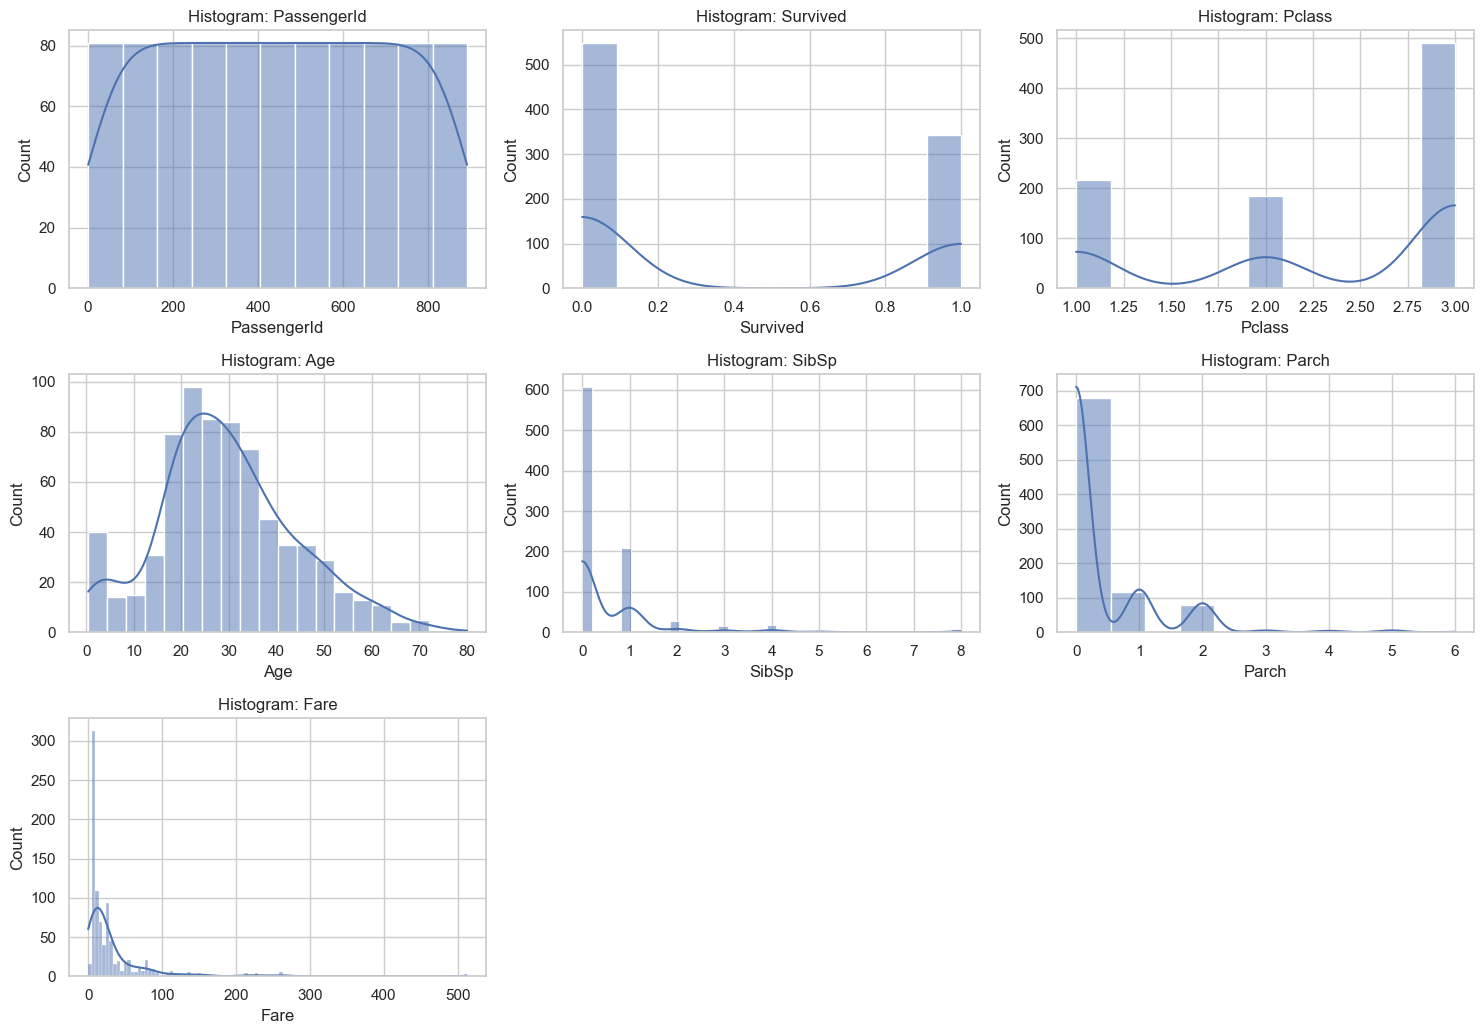

In [13]:
n = len(num_cols)
if n > 0:
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 3.5*nrows))
    axes = np.array(axes).reshape(-1) if nrows*ncols>1 else [axes]
    for ax, col in zip(axes, num_cols):
        sns.histplot(df[col], kde=True, ax=ax)
        ax.set_title(f"Histogram: {col}")
    for ax in axes[len(num_cols):]:
        ax.axis("off")
    plt.tight_layout()
    plt.show()

### 5) Univariate: boxplots for numeric (outlier view)

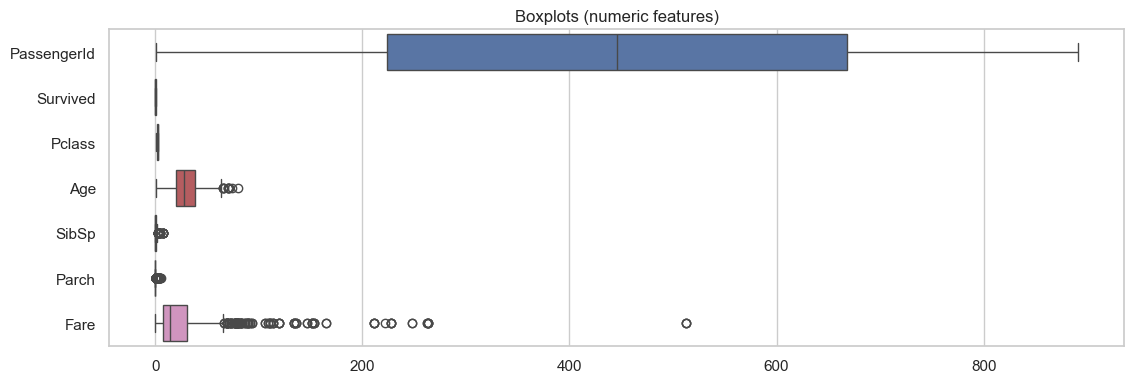

In [14]:
if len(num_cols) > 0:
    plt.figure(figsize=(min(12, 1 + 1.5*len(num_cols)), 0.5 + 0.5*len(num_cols)))
    sns.boxplot(data=df[num_cols], orient="h")
    plt.title("Boxplots (numeric features)")
    plt.tight_layout()
    plt.show()

### 6) Categorical distributions (top categories)

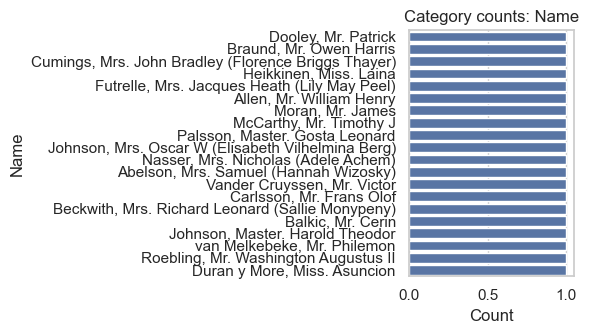

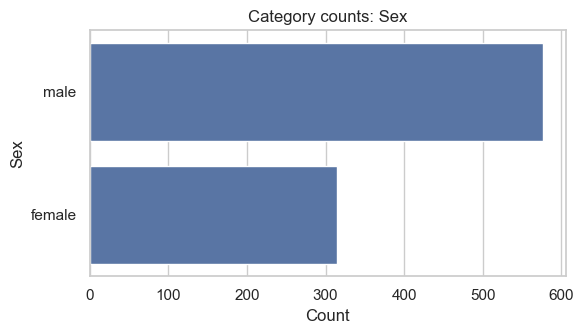

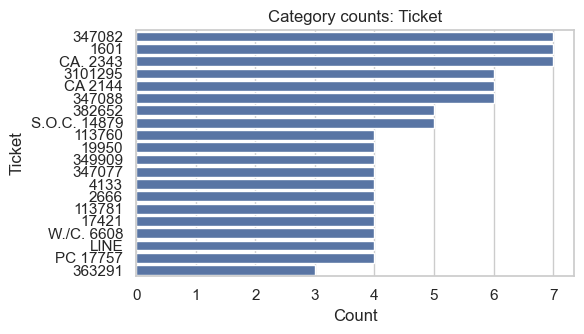

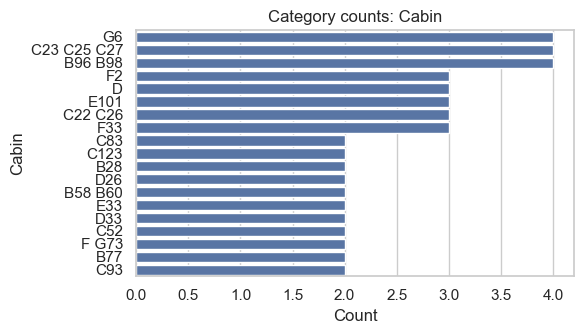

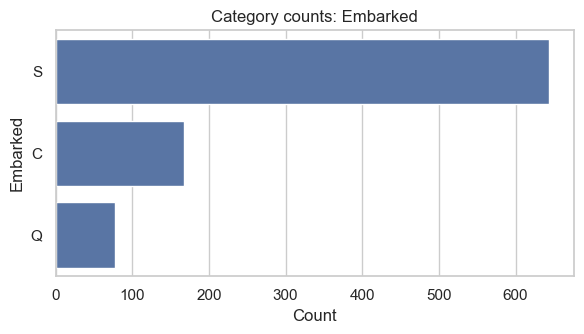

In [15]:
for col in cat_cols[:10]:  # limit if many
    vc = df[col].value_counts(dropna=False).head(20)
    plt.figure(figsize=(6, 3.5))
    sns.barplot(x=vc.values, y=vc.index, orient="h")
    plt.title(f"Category counts: {col}")
    plt.xlabel("Count")
    plt.tight_layout()
    plt.show()

### 7) Correlations: numeric heatmap

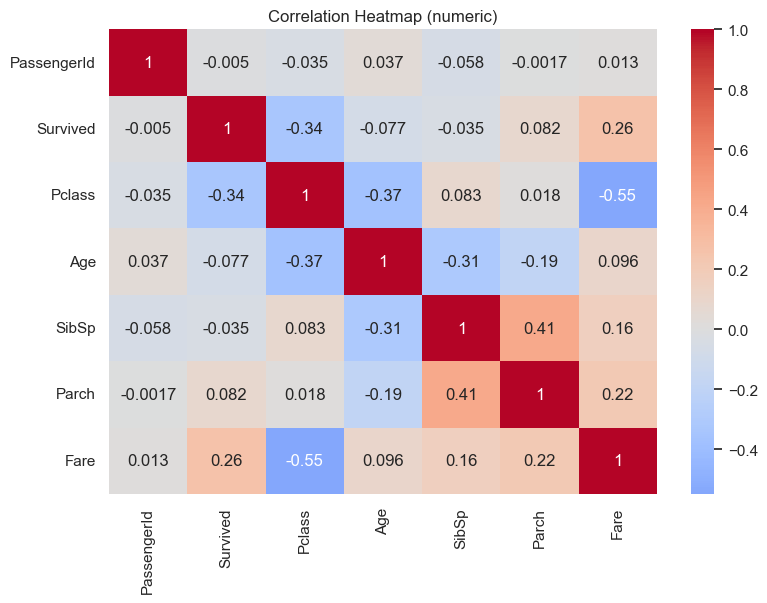

In [17]:
if len(num_cols) > 1:
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(0.6*len(num_cols)+4, 0.6*len(num_cols)+2))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap (numeric)")
    plt.tight_layout()
    plt.show()

### 8) Pairplot 

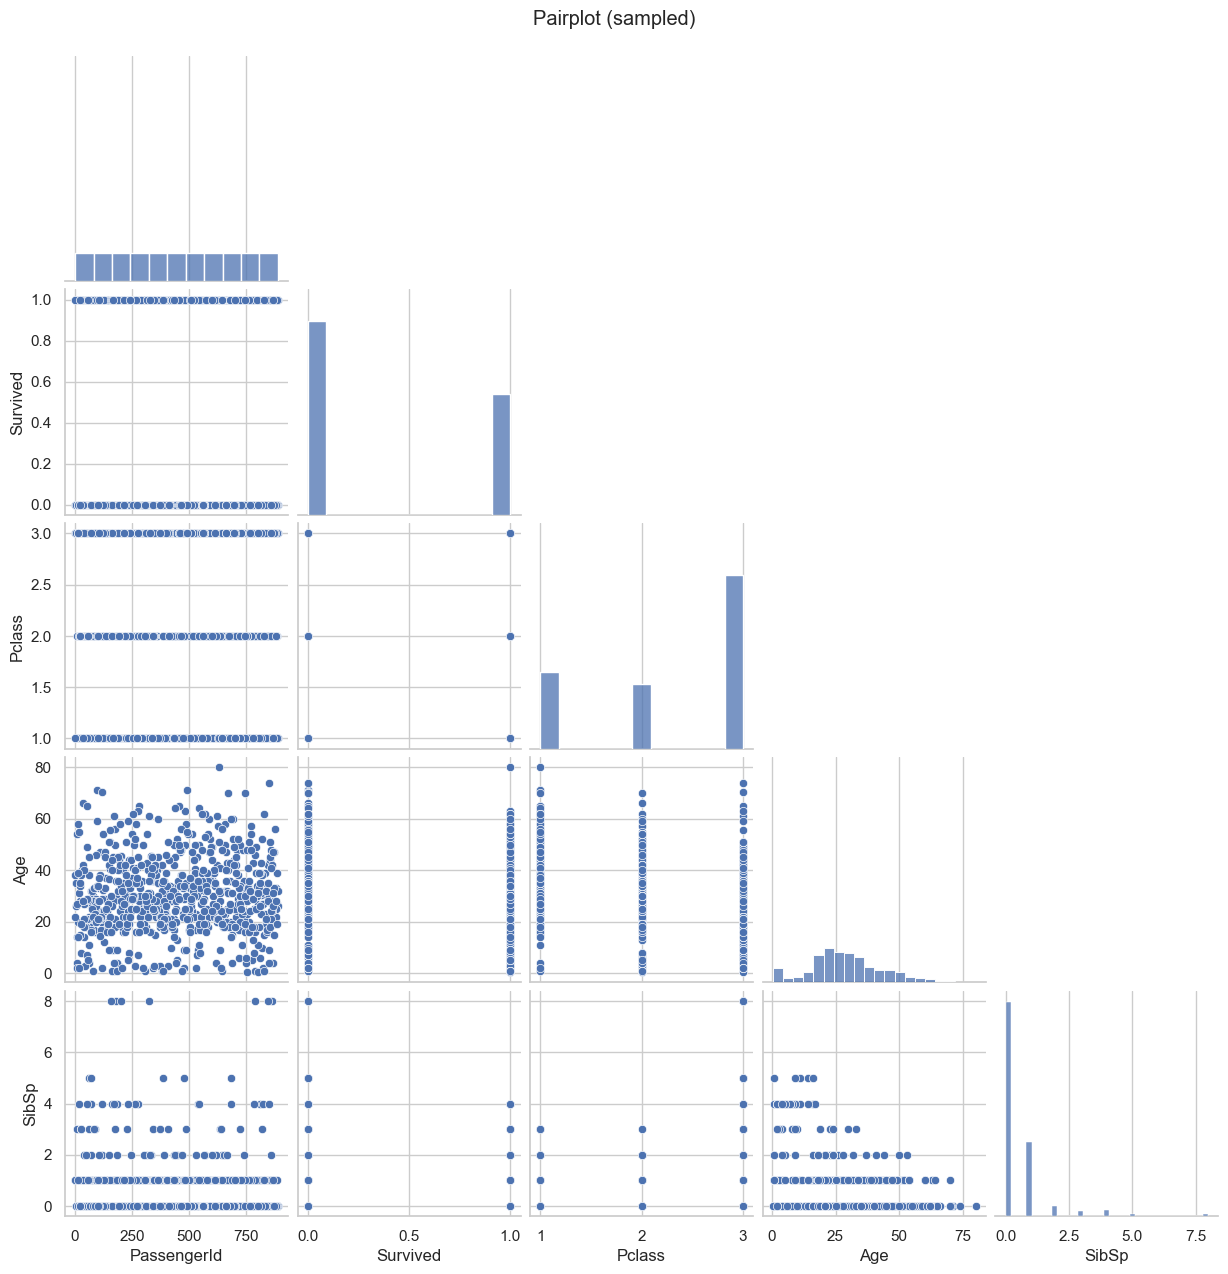

In [18]:
pair_cols = num_cols[:5]  # keep small for speed/clarity
if len(pair_cols) >= 2:
    df_sample = df[pair_cols].sample(min(len(df), 1000), random_state=42)
    g = sns.pairplot(df_sample, diag_kind="hist", corner=True)
    g.fig.suptitle("Pairplot (sampled)", y=1.02)
    plt.show()

### 9) Quick feature-level inferences

In [20]:
def quick_inferences(df, num_cols, cat_cols):
    notes = []
    # Skew and spread
    for c in num_cols:
        s = df[c].dropna()
        if len(s) == 0: 
            continue
        skew = s.skew()
        notes.append(f"{c}: mean={s.mean():.2f}, std={s.std():.2f}, skew={skew:.2f}")
    # High missing
    miss = df.isna().mean().sort_values(ascending=False)
    high_miss = miss[miss > 0.2]
    if len(high_miss):
        notes.append("High missing (>20%): " + ", ".join([f"{k}:{v:.0%}" for k,v in high_miss.items()]))
    # High correlation pairs
    if len(num_cols) > 1:
        corr = df[num_cols].corr(numeric_only=True).abs()
        tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
        pairs = tri.stack().sort_values(ascending=False).head(5)
        if len(pairs):
            notes.append("Top correlated pairs: " + ", ".join([f"{a}-{b}:{v:.2f}" for (a,b),v in pairs.items()]))
    return notes

for line in quick_inferences(df, num_cols, cat_cols):
    print("Inference:", line)

Inference: PassengerId: mean=446.00, std=257.35, skew=0.00
Inference: Survived: mean=0.38, std=0.49, skew=0.48
Inference: Pclass: mean=2.31, std=0.84, skew=-0.63
Inference: Age: mean=29.70, std=14.53, skew=0.39
Inference: SibSp: mean=0.52, std=1.10, skew=3.70
Inference: Parch: mean=0.38, std=0.81, skew=2.75
Inference: Fare: mean=32.20, std=49.69, skew=4.79
Inference: High missing (>20%): Cabin:77%
Inference: Top correlated pairs: Pclass-Fare:0.55, SibSp-Parch:0.41, Pclass-Age:0.37, Survived-Pclass:0.34, Age-SibSp:0.31
